## Modelagem Preditiva Avançada

### Regressão Linear - Teoria

Feature | Descrição	| Tipo
-----------|--------|------
AGE |Idade em Dias | Real
TEMPERATURE	| Temperatura da Agua | Real
SIZE | Tamanho do Peixe | Real


1° Passo 

Primeiramente vamos importar os seguinter pacotes:

+ **caret**: Biblioteca para funcionalidade de ML 
+ **mlbench**: Biblioteca para Validação de Modelos 
+ **ggplot2**: Biblioteca para visualização de dados

In [1]:
library(caret)
library(mlbench)
library(ggplot2)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


2° Passo

Agora vamos carregar o dataset, com cabeçalho (header=TRUE) e o separador de colunas sendo ','.

In [2]:
df <- read.csv(file="C:/Users/01549098/Documents/Analise_Preditiva_Avancada/Linear Regression/FIsh.csv", header=TRUE, sep=",")

3° Passo

Agora vamos fazer uma rápida análise dos dados buscando identificar algumas relações visualmente e também verificar a qualidade dos dados.

### Análise dos Dados

In [3]:
head(df)

AGE,TEMPERATURE,SIZE
14,25,620
28,25,1315
41,25,2120
55,25,2600
69,25,3110
83,25,3535


In [4]:
df$AGE <- as.numeric(df$AGE)
df$TEMPERATURE <- as.numeric(df$TEMPERATURE)
df$SIZE <- as.numeric(df$SIZE)

In [5]:
summary(df)

      AGE          TEMPERATURE        SIZE     
 Min.   : 14.00   Min.   :25.0   Min.   : 590  
 1st Qu.: 41.00   1st Qu.:26.5   1st Qu.:2135  
 Median : 83.00   Median :28.0   Median :3197  
 Mean   : 83.18   Mean   :28.0   Mean   :3107  
 3rd Qu.:125.00   3rd Qu.:29.5   3rd Qu.:4500  
 Max.   :153.00   Max.   :31.0   Max.   :4600  

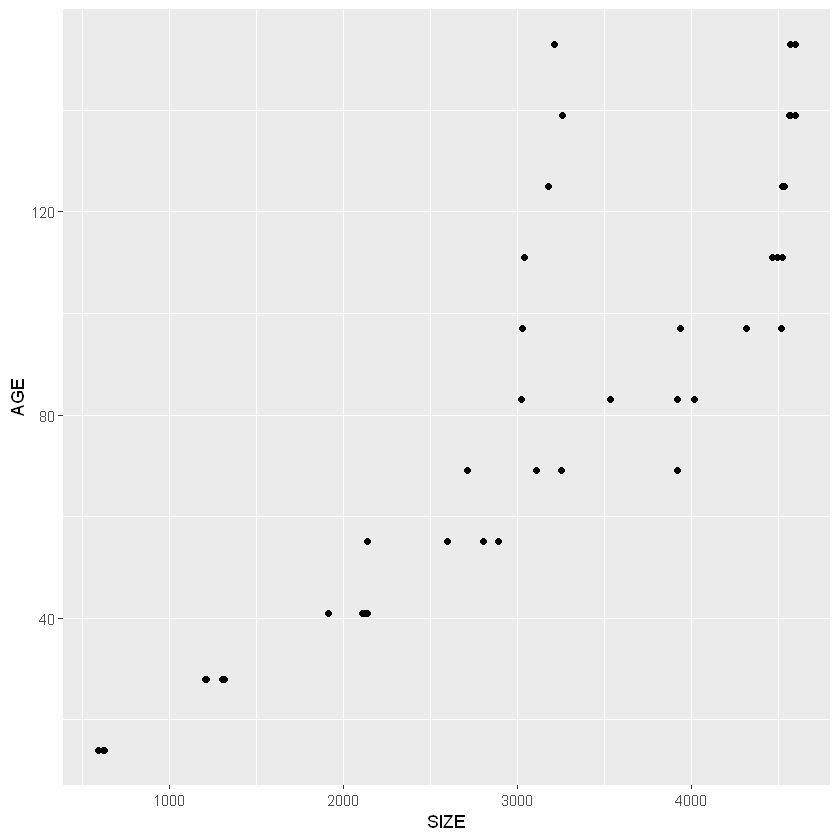

In [6]:
ggplot(data = df, aes(x = SIZE, y = AGE)) + geom_point()

### Particionando Dados em Treino e Teste

4° Passo

Agora vamos particionar o dataset em treino/teste. Para isso definimos "p=0.7", isto é 70% da base será escolhida aleatóriamente para treino e 30% para teste do modelo.

Observe também que o "set.seed(x)" garante que ao replicarmos essa partição em outro computador por exemplo, os mesmos dados irão respectivamente prar treino e teste

In [7]:
set.seed(280)
trainIndex <- createDataPartition(df$SIZE, p = .7, list = FALSE)

In [8]:
dfTrain <- df[ trainIndex,]
dfTest  <- df[-trainIndex,]

### Treinando Modelo Univariado

5° Passo

Observe que em "method" definimos "lm" de linear model e que definimos variável target sendo medv e inicialmente colocamos apenas a variável PRATIO como preditora."

In [9]:
set.seed(130)
model_uni <- train(SIZE~AGE, data = dfTrain ,method = "lm")

### Validação Modelo

6° Passo

Chamando o modelo obtemos informações como:

Número de amostras no treino

R2

etc

In [10]:
model_uni

Linear Regression 

32 samples
 1 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  706.5058  0.8009968  582.7788

Tuning parameter 'intercept' was held constant at a value of TRUE

7° Passo

Abaixo agora vamos obter os coeficientes do modelo, isto é:

y=α1(X1)+α2(X2)+α3(X3).... 

SIZE=α1(AGE)+α2(TEMPERATURE)....

In [11]:
coef.icept <- coef(model_uni$finalModel)[1]
coef.slope <- coef(model_uni$finalModel)[2]

In [12]:
coef.icept

(Intercept) 
   868.6433

In [13]:
coef.slope

AGE 
26.04582

8° Passo

Adicionando Gráfico para visualização do modelo linear no dataset.

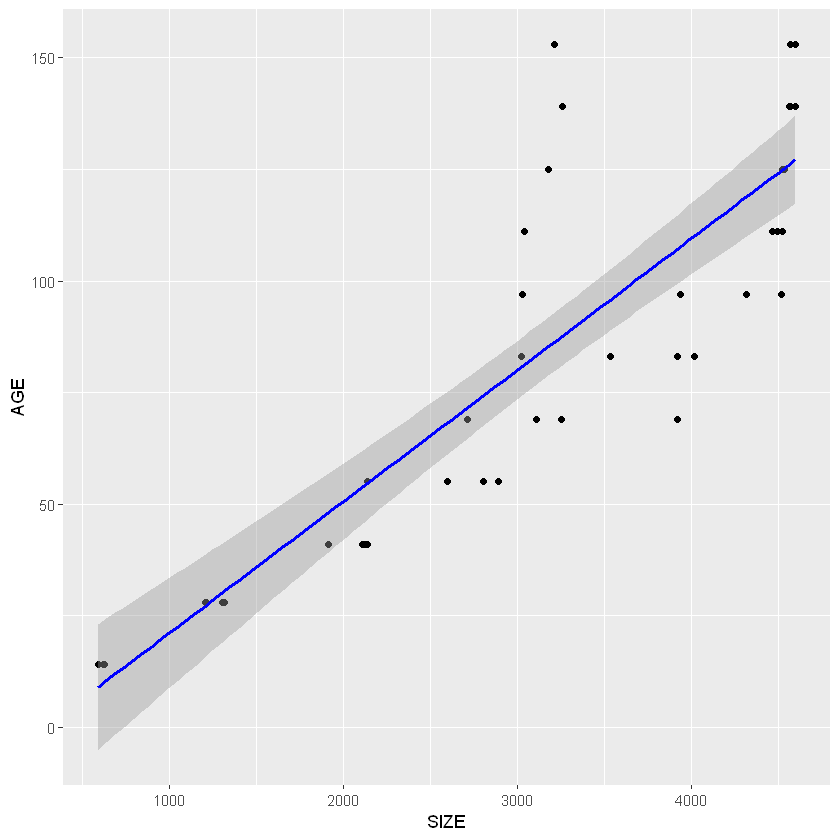

In [12]:
ggplot(data = df, aes(x = SIZE, y = AGE)) +
  geom_point() +
  stat_smooth(method ='lm', col='blue')

### Treinando Modelo Multivariado
9° Passo

Agora vamos treinar o modelo utilizando todas as variáveis disponíveis.

In [16]:
set.seed(149)
model_mult <- train(SIZE~., data = dfTrain ,method = "lm")

In [17]:
model_mult

Linear Regression 

32 samples
 2 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  606.4458  0.8100394  475.454

Tuning parameter 'intercept' was held constant at a value of TRUE

In [20]:
coef.icept <- coef(model_mult$finalModel)[1]
coef.slope <- coef(model_mult$finalModel)[2]
coef.slope2 <- coef(model_mult$finalModel)[3]
coef.slope3 <- coef(model_mult$finalModel)[4]
coef.icept
coef.slope
coef.slope2

(Intercept) 
    4877.64

AGE 
26.325

TEMPERATURE 
  -143.7173

In [24]:
coef(model_mult$finalModel)

(Intercept)         AGE TEMPERATURE 
  4877.6399     26.3250   -143.7173

10° Passo

Utilizando a função VarImp do mlbench e plotando sua tabela vemos em oredem as features mais importantes do modelos

loess r-squared variable importance

            Overall
AGE         0.87148
TEMPERATURE 0.05217

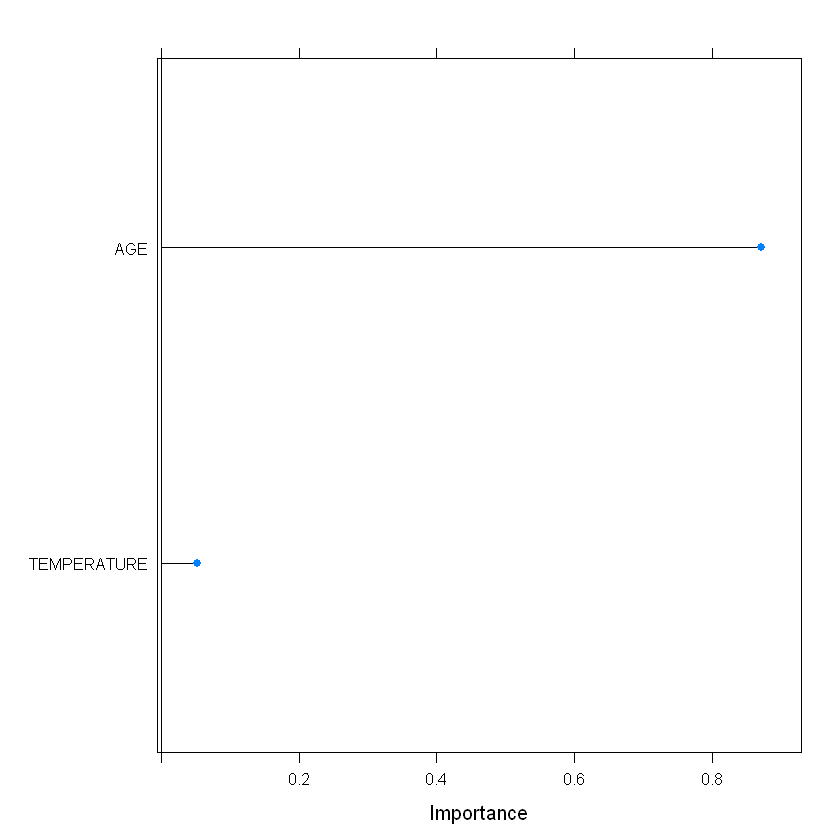

In [15]:
imp <- varImp(model_mult ,useModel=FALSE, scale=FALSE)
imp
plot(imp)

11° Passo

Agora com o modelo treinado podemos fazer o "scoring" nos dados que haviam sindo separados para teste e quaisquer outros que o modelo ainda não tenha visto.

In [16]:
y_Model <- predict(model_mult, dfTest)
dfTest$Model <- y_Model
dfTest$Differenca <- (dfTest$SIZE - dfTest$Model)
head(dfTest)

,AGE,TEMPERATURE,SIZE,Model,Differenca
2,28,25,1315,2021.807,-706.80708
11,153,25,4600,5312.432,-712.43172
13,28,27,1215,1734.372,-519.37246
15,55,27,2805,2445.147,359.85261
17,83,27,4015,3182.247,832.75270
21,139,27,4600,4656.447,-56.44714
